
<div style="text-align: center;"> <h2 style="color:blue;"> INSAID </h2></div>
          <div style="text-align: center;"> <h2 style="color:blue;"> Internship Task </h2></div>          
<div style="text-align: right; font-weight: bold; font-style: italic;">
- by Rohan Prabhakar
</div>



#

## Importing necessary libraries and understanding the data

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
#from sklearn.ensemble import RandomForestClassifier

In [4]:
data= pd.read_csv(r"C:\Users\Rohan\Downloads\Fraud.csv")

In [5]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### we can see that there are no missing values so we can continue with the process

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## all the data types are proper so there is no need for converting the datatype

In [8]:
pd.set_option('display.float_format', '{:,.0f}'.format)
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"6,362,620","6,362,620","6,362,620","6,362,620","6,362,620","6,362,620","6,362,620","6,362,620"
mean,243,"179,862","833,883","855,114","1,100,702","1,224,996",0,0
std,142,"603,858","2,888,243","2,924,049","3,399,180","3,674,129",0,0
min,1,0,0,0,0,0,0,0
25%,156,"13,390",0,0,0,0,0,0
50%,239,"74,872","14,208",0,"132,706","214,661",0,0
75%,335,"208,721","107,315","144,258","943,037","1,111,909",0,0
max,743,"92,445,517","59,585,040","49,585,040","356,015,889","356,179,279",1,1


In [9]:
data_1=data[data['nameDest'].str.startswith('M')]
data_1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,840",C1231006815,"170,136","160,296",M1979787155,0,0,0,0
1,1,PAYMENT,"1,864",C1666544295,"21,249","19,385",M2044282225,0,0,0,0
4,1,PAYMENT,"11,668",C2048537720,"41,554","29,886",M1230701703,0,0,0,0
5,1,PAYMENT,"7,818",C90045638,"53,860","46,042",M573487274,0,0,0,0
6,1,PAYMENT,"7,108",C154988899,"183,195","176,087",M408069119,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,"8,178",C1213413071,"11,742","3,564",M1112540487,0,0,0,0
6362314,718,PAYMENT,"17,841",C1045048098,"10,182",0,M1878955882,0,0,0,0
6362316,718,PAYMENT,"1,023",C1203084509,12,0,M675916850,0,0,0,0
6362318,718,PAYMENT,"4,110",C673558958,"5,521","1,411",M1126011651,0,0,0,0


In [10]:
data_1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"2,151,495","2,151,495","2,151,495","2,151,495","2,151,495","2,151,495","2,151,495","2,151,495"
mean,244,"13,058","68,217","61,838",0,0,0,0
std,143,"12,556","198,991","196,992",0,0,0,0
min,1,0,0,0,0,0,0,0
25%,156,"4,384",0,0,0,0,0,0
50%,249,"9,482","10,530",0,0,0,0,0
75%,335,"17,561","60,883","49,654",0,0,0,0
max,718,"238,638","43,686,616","43,673,802",0,0,0,0


## as mentioned in the data dictionary there are no information about oldbalanceDest and newbalanceDest but we cannot drop the row as they might be important for prediciton so we create a new column which might be usefull for prediction

#


<h2 style="text-align: center;">Feature Engineering</h2>


In [11]:
data['isMerchant']=data['nameDest'].str.startswith('M').astype(int)

In [12]:
# TransationHours can be used to check weather there is any specific our that the fraud transation is being made
data['TransactionHours']= data['step'] % 24

In [13]:
# To check weather there was succesfull transfer
data['balanceDiffOrig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balanceDiffDest'] = data['newbalanceDest'] - data['oldbalanceDest']


In [14]:
# most of the fraudsters completly drain the amount so we use this column to train
data['isDrained'] = (data['newbalanceOrig'] == 0) & (data['oldbalanceOrg'] > 0)
data['isDrained'] = data['isDrained'].astype(int)

In [15]:
data['types']=data['type']

### We are not using Label encoder because the TYPES columns contain category which are not ordinal so if we use label encoder then it will assign values as 1,2,3,4 which might confuse the model

In [16]:
 # We use one-hot encoding for conveting category values for prediction.
data=pd.get_dummies(data, columns=['types'], drop_first= True)

In [17]:
# can be used the relate isFlaggedFraud
data['isHigh']=data['amount'] > 20000

In [18]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,isMerchant,TransactionHours,balanceDiffOrig,balanceDiffDest,isDrained,types_CASH_OUT,types_DEBIT,types_PAYMENT,types_TRANSFER,isHigh
0,1,PAYMENT,"9,840",C1231006815,"170,136","160,296",M1979787155,0,0,0,...,1,1,"9,840",0,0,False,False,True,False,False
1,1,PAYMENT,"1,864",C1666544295,"21,249","19,385",M2044282225,0,0,0,...,1,1,"1,864",0,0,False,False,True,False,False
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,...,0,1,181,0,1,False,False,False,True,False
3,1,CASH_OUT,181,C840083671,181,0,C38997010,"21,182",0,1,...,0,1,181,"-21,182",1,True,False,False,False,False
4,1,PAYMENT,"11,668",C2048537720,"41,554","29,886",M1230701703,0,0,0,...,1,1,"11,668",0,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,"339,682",C786484425,"339,682",0,C776919290,0,"339,682",1,...,0,23,"339,682","339,682",1,True,False,False,False,True
6362616,743,TRANSFER,"6,311,409",C1529008245,"6,311,409",0,C1881841831,0,0,1,...,0,23,"6,311,409",0,1,False,False,False,True,True
6362617,743,CASH_OUT,"6,311,409",C1162922333,"6,311,409",0,C1365125890,"68,489","6,379,898",1,...,0,23,"6,311,409","6,311,409",1,True,False,False,False,True
6362618,743,TRANSFER,"850,003",C1685995037,"850,003",0,C2080388513,0,0,1,...,0,23,"850,003",0,1,False,False,False,True,True


#

###

# 
<h2 style="text-align: center;">Visualization</h2>


### Customer vs Merchent Chart

There are: isMerchant
0    4211125
1    2151495
Name: count, dtype: int64 
where 0 is Customer and 1 is Merchent

-----------------------------------------------


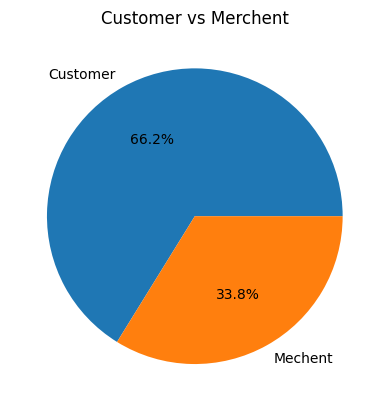

In [19]:
a=data['isMerchant'].value_counts()
print(f'There are:',a,'\nwhere 0 is Customer and 1 is Merchent')
print('\n-----------------------------------------------')
plt.pie(a,labels={"Customer":0,'Mechent':1},autopct='%0.1f%%')
plt.title('Customer vs Merchent')
plt.show()

### so there are around 21 lakh merchent transaction and covers about 34% of the dataset




### Types

There are:        type    count
0  CASH_OUT  2237500
1   PAYMENT  2151495
2   CASH_IN  1399284
3  TRANSFER   532909
4     DEBIT    41432

-----------------------------------------------


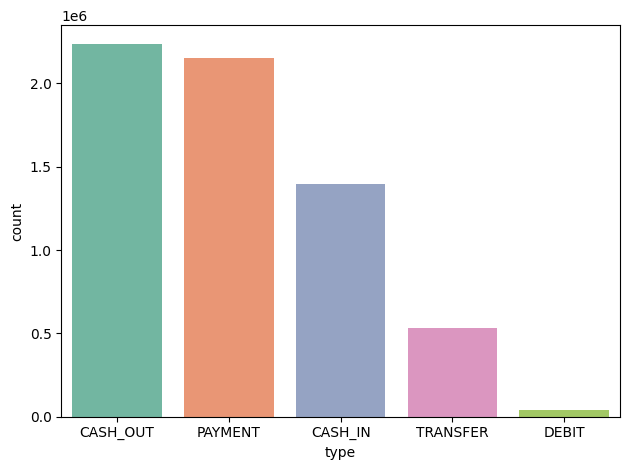

In [20]:
b= data['type'].value_counts().reset_index()
print(f'There are:',b)
print('\n-----------------------------------------------')

sns.barplot(x=b['type'],y=b['count'],hue=b['type'],palette='Set2')
plt.tight_layout()
plt.show()

### Most of the transactions are of Cash_out and Payment type 
### And if we think logically fraud can only occur during Transfer and Cash_Out

#

### Transaction Hours

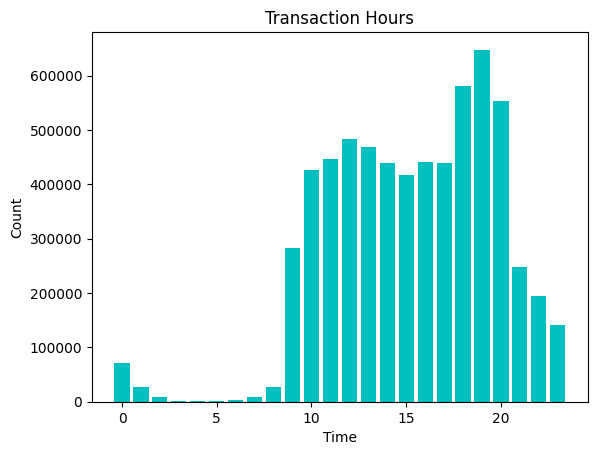

In [21]:
c= data['TransactionHours'].value_counts().reset_index()

plt.bar(c['TransactionHours'],c['count'],color='c')
plt.title('Transaction Hours')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

### Almost all the trancsations are done during day time and most tansactions takes place between 4pm and 9pm, Therefore we can say that most fraud transactions might occur during evening



## To check Bank Account empty or not

In [22]:
Bacc=data['isDrained'].value_counts().reset_index()
Bacc

,isDrained,count
0,0,4842039
1,1,1520581


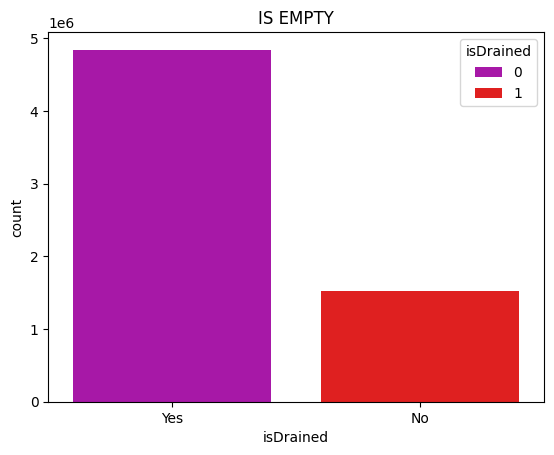

In [23]:
sns.barplot(x='isDrained',hue='isDrained',y='count',data=Bacc,palette=['m','r'])
plt.title('IS EMPTY')
plt.xticks([0, 1], ['Yes','No'])
plt.show()

There are: isFraud
0    6354407
1       8213
Name: count, dtype: int64

-----------------------------------------------
isFraud
0   100
1     0
Name: count, dtype: float64


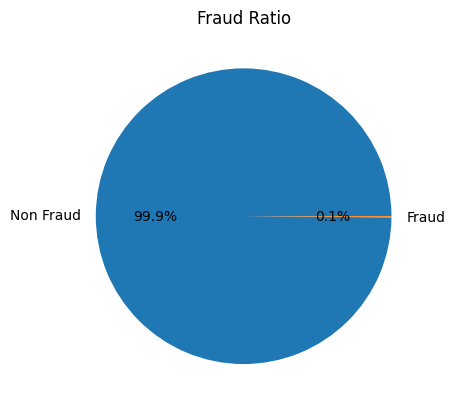

In [24]:
e=data['isFraud'].value_counts()
print(f'There are:',e)
print('\n-----------------------------------------------')

percentage = (e / e.sum()) * 100
print(percentage)

plt.pie(e,labels={"Non Fraud":0,'Fraud':1},autopct='%0.1f%%')
plt.title('Fraud Ratio')
plt.show()



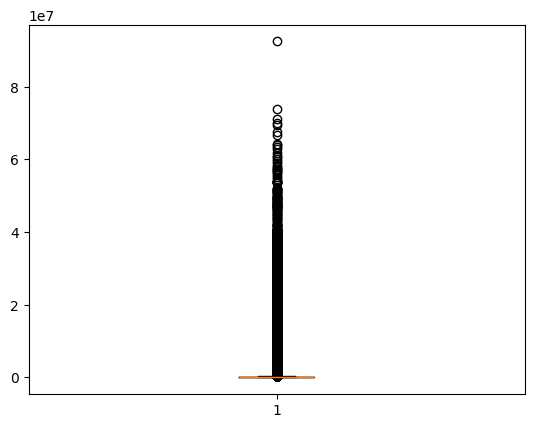

In [25]:
plt.boxplot(data['amount'])
plt.show()

In [26]:
new_data=data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'isMerchant', 'TransactionHours', 'balanceDiffOrig',
       'balanceDiffDest', 'isDrained', 'types_CASH_OUT', 'types_DEBIT',
       'types_PAYMENT', 'types_TRANSFER', 'isHigh']]
corr= new_data.corr()


<Axes: >

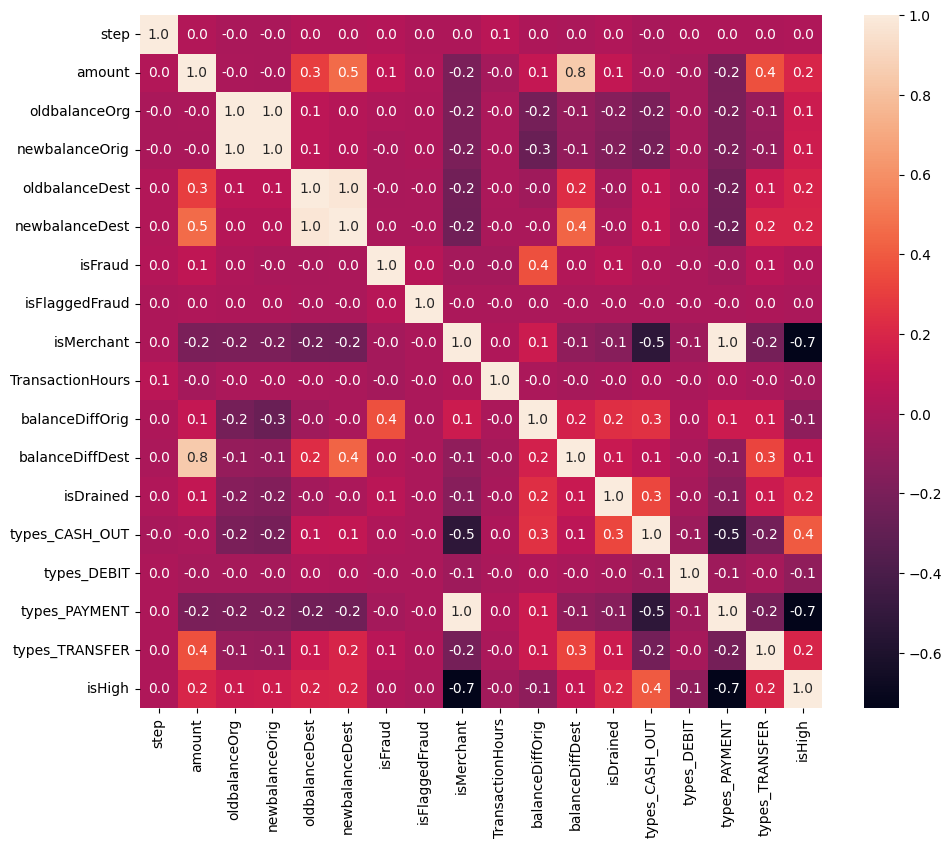

In [27]:
plt.figure(figsize=(11,9))
sns.heatmap(corr,annot=True, fmt=".1f")

### Most of the accounts are seemed to be empty after the transaction which makes it a suspecious transaction

In [28]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'isMerchant', 'TransactionHours', 'balanceDiffOrig',
       'balanceDiffDest', 'isDrained', 'types_CASH_OUT', 'types_DEBIT',
       'types_PAYMENT', 'types_TRANSFER', 'isHigh'],
      dtype='object')

In [29]:
for val in data.columns:
    if len(data[val].value_counts()) <=2:
        print(f'{val} is binomial')

isFraud is binomial
isFlaggedFraud is binomial
isMerchant is binomial
isDrained is binomial
types_CASH_OUT is binomial
types_DEBIT is binomial
types_PAYMENT is binomial
types_TRANSFER is binomial
isHigh is binomial


#

### 

<h2 style="text-align: center;">Modelling</h2>


### First model

In [108]:
x=data[['step', 'amount',  'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'isMerchant', 'TransactionHours', 'isDrained', 'types_CASH_OUT', 'types_DEBIT',
       'types_PAYMENT', 'types_TRANSFER', 'isHigh']]                                         ### We dont need few columns so we remove those
y=data['isFraud']

x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,random_state= 42)


In [109]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [110]:
y_predict=model.predict(x_test)

In [111]:
print('The model score is:',model.score(x_test, y_test) * 100)

The model score is: 99.96982375185065


In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy:   {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision:   {precision_score(y_test, y_pred)*100}%")
print(f"Recall:   {recall_score(y_test, y_pred)*100}%")
print(f"F1 Score:   {f1_score(y_test, y_pred)*100}%")


Accuracy:   99.90800435460025%
Precision:   100.0%
Recall:   27.88501026694045%
F1 Score:   43.60950545921644%


##

<Axes: title={'center': 'Feature Importances'}>

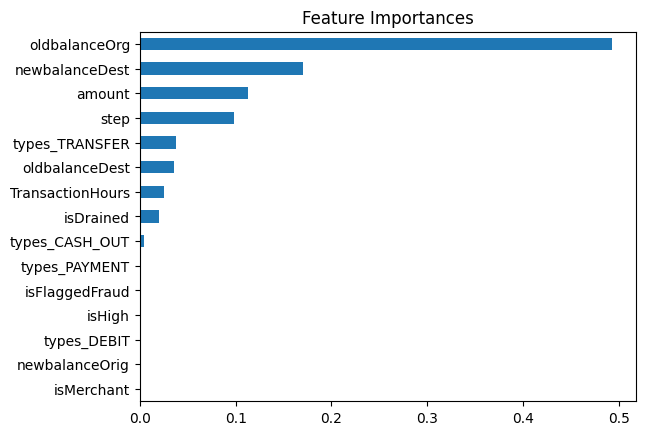

In [225]:
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', title='Feature Importances')

### this can be used to identify the important feature for modeling
##

## Second model

In [94]:
x=data[['step', 'amount',  'oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest',
        'TransactionHours', 'isDrained', 'types_CASH_OUT',
       'types_PAYMENT', 'types_TRANSFER']]                                         
y=data['isFraud']

X_train,X_test,Y_train,Y_test= train_test_split(x,y,train_size=0.8,random_state= 42)


In [153]:
model = DecisionTreeClassifier(class_weight='balanced',max_depth=10)
model.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [154]:
Y_predict=model.predict(X_test)

In [155]:
print(f"Accuracy:   {accuracy_score(Y_test, Y_predict)*100}%")
print(f"Precision:   {precision_score(Y_test, Y_predict)*100}%")
print(f"Recall:   {recall_score(Y_test, Y_predict)*100}%")
print(f"F1 Score:   {f1_score(Y_test, Y_predict)*100}%")

Accuracy:   99.28991516073567%
Precision:   15.091319902090003%
Recall:   98.95061728395062%
F1 Score:   26.188531285737625%


In [156]:
print(classification_report(Y_test, Y_predict, labels=[1,0]))


              precision    recall  f1-score   support

           1       0.15      0.99      0.26      1620
           0       1.00      0.99      1.00   1270904

    accuracy                           0.99   1272524
   macro avg       0.58      0.99      0.63   1272524
weighted avg       1.00      0.99      1.00   1272524



### from the above model we can say that 99% of all the fraudsters can be fragged but out of this 99% only 15% of transactions are actually fraud and remaining 85% of the transaction are legit so we can further tune the model for more accurate

#
## third model


In [166]:
model = DecisionTreeClassifier(class_weight={0: 1, 1: 10},max_depth=10)      
model.fit(X_train,Y_train)

'''
In this we assign class_weight={0: 1, 1: 10} because the dataset is not balanced which will lead to less accuracy therefore
we assign Non fraud transacion as 1 and fraud transaction as 10 which means to give more priority to the fraud transaction transation 
even thought there are only less data. the main reason for this is to prioritize for increasing the recall.
Which lets us control how important fraud transactions is.
'''


DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=10)

In [158]:
Y_predict=model.predict(X_test)

In [159]:
print(f"Accuracy:   {accuracy_score(Y_test, Y_predict)*100}%")
print(f"Precision:   {precision_score(Y_test, Y_predict)*100}%")
print(f"Recall:   {recall_score(Y_test, Y_predict)*100}%")
print(f"F1 Score:   {f1_score(Y_test, Y_predict)*100}%")

Accuracy:   99.9453055502293%
Precision:   74.3414120126449%
Recall:   87.09876543209877%
F1 Score:   80.2160318362706%


In [160]:
print(classification_report(Y_test, Y_predict, labels=[1,0]))


              precision    recall  f1-score   support

           1       0.74      0.87      0.80      1620
           0       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.87      0.94      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



## The model achieves a recall of 87% on the fraud class, meaning it successfully detects 87% of all fraudulent transactions. However, 13% of fraud cases are missed. This suggests the model is effective at identifying fraud but may benefit from further tuning to reduce false negatives.

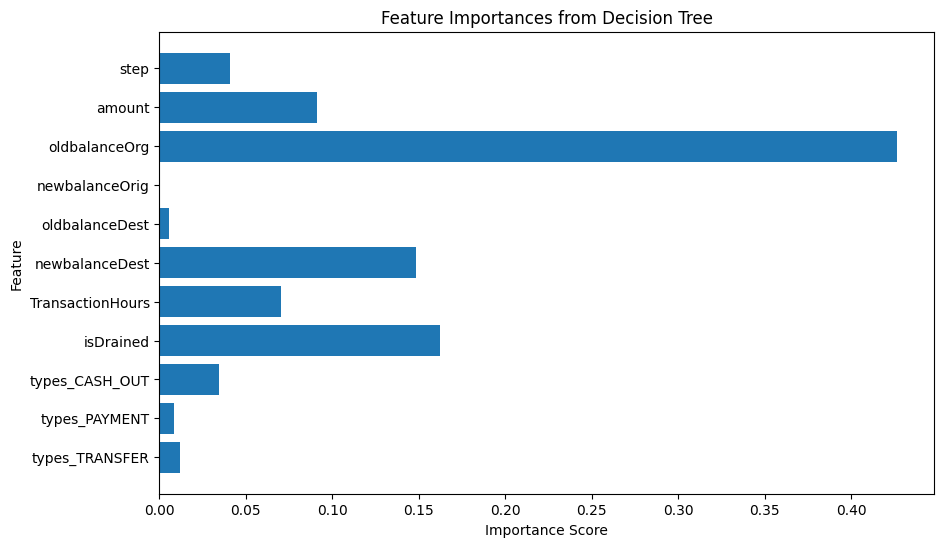

In [201]:
plt.figure(figsize=(10,6))
plt.barh(importances_df['Feature'],model.feature_importances_)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

#
#
#

#
<h2 style="text-align: center;">Questions mentioned in the task</h2>


## 1. Data cleaning including missing values, outliers and multi-collinearity. 
### The data which was about the Fraud transaction was clean and dint require any changes like Data type change. 99% of the data consisted of legit transation and only few fraud transactions were recorded. Though there were missing information about the Transaction Amount of Merchent's acount , i took care of it by feature engineeing and not removing the data of merchents as they might be important for modelling

##
# 2. Describe your fraud detection model in elaboration. 
### After all the EDA process and Feature engineering i started modelling using DecisionTreeClassifier model from Sci-kit learn Library for analying and predicting. During feature engineering, i converted TYPE feature which was catogerical into numeric using one-hot coding which converted categories in column into different columns. i used this method insted of label encoding as the categorical values were nominal and not ordinal. After finishing these steps i started modelling. i created 3 models for better prediction. 
### --> The first model was for initial understanding of how model acts on the data and for identifying important feature for better prediction
### --> In second model becase there  was too much domination of 1 categorical data i.e 99% of the data was about transaction which legit and not fraud, so we had to used 'Balanced' class weight.
### --> The third model was more accurate and reliable compared to 2nd one as there i used a manual weighted class which mention the model to give more importance to Fraud Transactions
#

# 3. How did you select variables to be included in the model?
### First i removed 2 columns which were nameOrig and nameDest as they were irrelevent to data, next i created new columns from existing data so that the model understand all the data including unseen data. For more accurate variable selection i modelled the data and extraced the important one


#
# 4. Demonstrate the performance of the model by using best set of tools. 
### For Evaluating the Performance i used DecisionTreeClassifier accuracy, F1 score, Recall, and Precision, in which recall plays important role of eveluating the fraud detection
### In the second model we saw that recall is 99% which tells us that all the fraud transaction as flagged but we can also see that precision is 15% which is very low which tell us that out of all the flagged fraud transactions only 15% od the transaction are actually fraud and reset 85% are not. It is actually good when comes to fraud detection as "It is better to investigate a innocent person who is not a fraudster rather than not investigating actual fraudster" but the cons are it might be time consuming and waste of time
### In the 3rd model which is the better one  represents that the recall value is 87% and precision is 74% which tells us that 84% of transaction as correctly fraggerd as fraud but only 74% out of it is actual fraud transaction.


#
# 5. What are the key factors that predict fraudulent customer? 
### We can say that the type of account i.e cashout and the amount a customer hold in his account. which means that fraudsters usually prefer to fraud the account that contains higher amount


#
# 6. Do these factors make sense? If yes, How? If not, How not? 
### Yes, these factors make sense as most of the fraud transaction are of CashOut Type and account which hight balance often get Fraud attacks

#
# 7. What kind of prevention should be adopted while company update its infrastructure?
### While updating its infracture the company should make should Implement Transaction Monitoring i.e analyse the customers usual sending habbits and give a check when there is a huge amount transaction. And should ensure that the recipient got the money or not.

#
# 8. Assuming these actions have been implemented, how would you determine if they work?
### To check wether if its implement properly, we can again run this model with the new set of data after inspecting the updated process. 